<a href="https://colab.research.google.com/github/monicasjsu/deep_learning/blob/master/lesson_1_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64


In [49]:
path = untar_data(URLs.FOOD, dest='./fastai/datasets')
path

PosixPath('fastai/datasets/food-101')

In [50]:
path.ls()

[PosixPath('fastai/datasets/food-101/classes.txt'),
 PosixPath('fastai/datasets/food-101/train.txt'),
 PosixPath('fastai/datasets/food-101/test.json'),
 PosixPath('fastai/datasets/food-101/labels.txt'),
 PosixPath('fastai/datasets/food-101/h5'),
 PosixPath('fastai/datasets/food-101/images'),
 PosixPath('fastai/datasets/food-101/test.txt'),
 PosixPath('fastai/datasets/food-101/train.json')]

In [0]:
path_img = path/'images'
path_text = path/'labes.txt'
path_train = path/'train.txt'


In [57]:
fnames = get_image_files(path_img, recurse=True)
fnames[:5]

[PosixPath('fastai/datasets/food-101/images/fried_calamari/1335801.jpg'),
 PosixPath('fastai/datasets/food-101/images/fried_calamari/1355497.jpg'),
 PosixPath('fastai/datasets/food-101/images/fried_calamari/1724289.jpg'),
 PosixPath('fastai/datasets/food-101/images/fried_calamari/3223020.jpg'),
 PosixPath('fastai/datasets/food-101/images/fried_calamari/854958.jpg')]

In [0]:
np.random.seed(2)
pat = r'\/([^\/]+)\/\d+.jpg$'

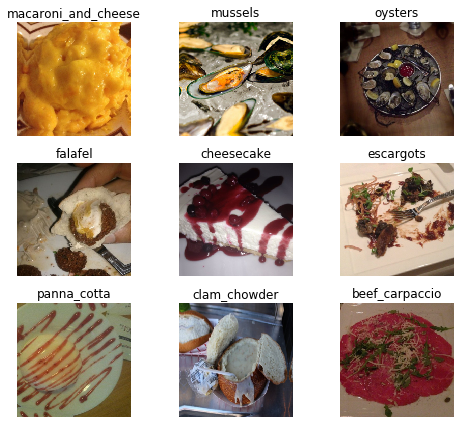

In [63]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(7,6))

In [65]:
print(data.classes)
len(data.classes),data.c

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

(101, 101)

In [66]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [67]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [68]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.186665,1.690164,0.434505,28:42
1,1.774657,1.412726,0.367772,27:39
2,1.597430,1.274512,0.332673,26:30
3,1.451017,1.243402,0.324059,26:24


In [0]:
learn.save('stage-1')

In [70]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

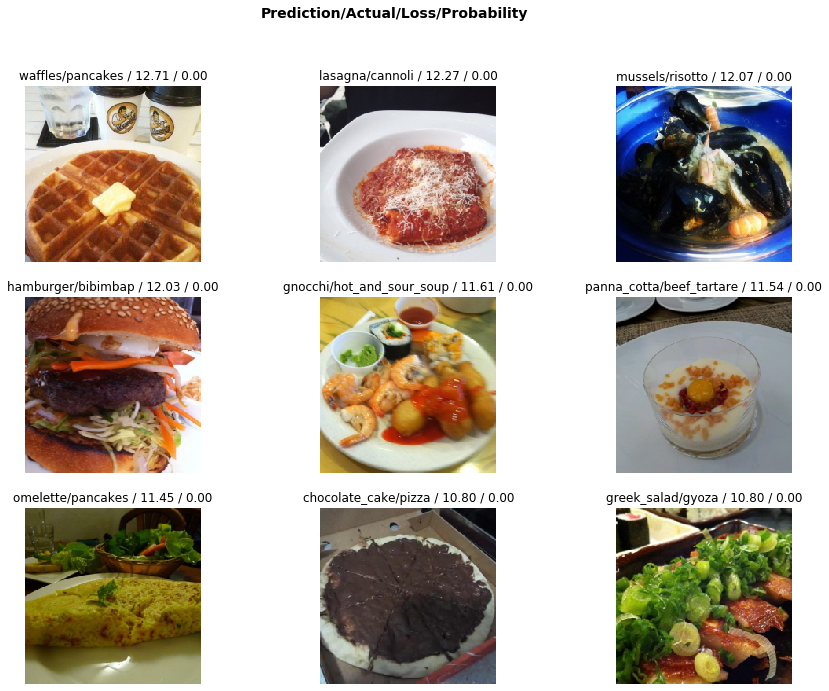

In [71]:
interp.plot_top_losses(9, figsize=(15,11))

In [72]:
doc(interp.plot_top_losses)

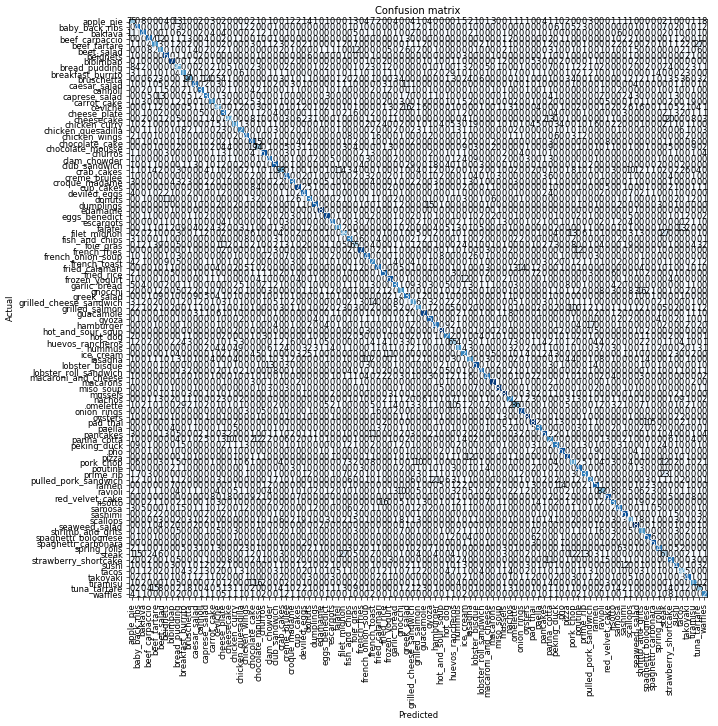

In [73]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [76]:
interp.most_confused(min_val=10)

[('beef_tartare', 'tuna_tartare', 27),
 ('filet_mignon', 'steak', 27),
 ('steak', 'filet_mignon', 27),
 ('prime_rib', 'steak', 23),
 ('pulled_pork_sandwich', 'hamburger', 21),
 ('cheesecake', 'strawberry_shortcake', 20),
 ('chocolate_mousse', 'chocolate_cake', 19),
 ('hamburger', 'pulled_pork_sandwich', 17),
 ('ceviche', 'greek_salad', 16),
 ('gnocchi', 'shrimp_and_grits', 16),
 ('risotto', 'fried_rice', 16),
 ('tiramisu', 'chocolate_mousse', 16),
 ('chocolate_cake', 'chocolate_mousse', 15),
 ('dumplings', 'gyoza', 15),
 ('steak', 'baby_back_ribs', 15),
 ('tuna_tartare', 'beef_tartare', 15),
 ('bruschetta', 'caprese_salad', 14),
 ('fried_calamari', 'onion_rings', 14),
 ('grilled_cheese_sandwich', 'french_toast', 14),
 ('ramen', 'pho', 14),
 ('apple_pie', 'bread_pudding', 13),
 ('caprese_salad', 'beet_salad', 13),
 ('cheesecake', 'panna_cotta', 13),
 ('falafel', 'tacos', 13),
 ('filet_mignon', 'pork_chop', 13),
 ('lobster_bisque', 'clam_chowder', 13),
 ('steak', 'prime_rib', 13),
 ('bee

In [0]:
learn.unfreeze()

In [78]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.216964,1.001705,0.263713,27:31


In [0]:
learn.load('stage-1');

In [82]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


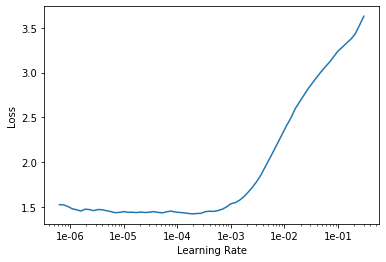

In [81]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [84]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


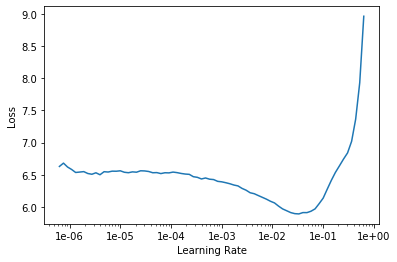

In [85]:
learn.lr_find()
learn.recorder.plot()

In [87]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.900653,1.424931,0.374851,30:26
1,1.425134,1.085293,0.290248,29:17
2,1.201637,0.943420,0.252525,28:27
3,1.102959,0.900514,0.241683,28:09


In [0]:
learn.save('stage-1-50')

In [89]:
interp = ClassificationInterpretation.from_learner(learn)

In [91]:
interp.most_confused(min_val=10)

[('steak', 'filet_mignon', 35),
 ('chocolate_mousse', 'chocolate_cake', 26),
 ('steak', 'pork_chop', 26),
 ('apple_pie', 'bread_pudding', 23),
 ('steak', 'prime_rib', 21),
 ('hamburger', 'pulled_pork_sandwich', 20),
 ('chocolate_cake', 'chocolate_mousse', 19),
 ('filet_mignon', 'steak', 19),
 ('prime_rib', 'steak', 18),
 ('ramen', 'pho', 17),
 ('beef_tartare', 'tuna_tartare', 16),
 ('lobster_bisque', 'clam_chowder', 16),
 ('grilled_salmon', 'pork_chop', 15),
 ('steak', 'baby_back_ribs', 15),
 ('sushi', 'sashimi', 15),
 ('tuna_tartare', 'beef_tartare', 15),
 ('cheesecake', 'panna_cotta', 14),
 ('chicken_quesadilla', 'breakfast_burrito', 14),
 ('pork_chop', 'steak', 14),
 ('bread_pudding', 'apple_pie', 13),
 ('cheesecake', 'strawberry_shortcake', 13),
 ('chocolate_cake', 'cup_cakes', 13),
 ('filet_mignon', 'pork_chop', 13),
 ('pulled_pork_sandwich', 'hamburger', 13),
 ('ravioli', 'gnocchi', 13),
 ('beet_salad', 'greek_salad', 12),
 ('chocolate_mousse', 'tiramisu', 12),
 ('pork_chop', 'gr